In [1]:
import os
import requests

# Clone the repository
os.system("git clone https://github.com/IDEA-Research/GroundingDINO.git")

fatal: destination path 'GroundingDINO' already exists and is not an empty directory.


32768

In [ ]:
# Change directory to the cloned repository
#can we create an environment here just for the workshop?
os.chdir(os.path.join("GroundingDINO"))

# Install the package in editable mode
os.system("pip install -q -e .")

# Install the supervision package
os.system("pip install supervision")

In [3]:
# Check the current working directory (useful for debugging)
os.getcwd()

'/Users/syednafisishrak/Innowing research AI/cv/GroundingDino/GroundingDINO'

In [4]:
#DIRECTORY NEEDS TO BE RELATIVE NOT ABSOLUTE/ differs for mine and Gene's. Also might differ for the Innowing computer - linux vs windows

project_dir = os.path.expanduser("/Users/syednafisishrak/Innowing research AI/cv/GroundingDino/GroundingDINO")

THE next step takes some time to download all the weights! (took me 5m30s for the first time)

In [5]:
# Create a directory for weights
weights_dir = os.path.join(project_dir,"weights")
os.makedirs(weights_dir, exist_ok=True)

# Change directory to the weights directory
os.chdir(weights_dir)

# Download the pre-trained model weights
weight_url = "https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth"
weight_filename = os.path.basename(weight_url)
weight_filepath = os.path.join(weights_dir, weight_filename)

response = requests.get(weight_url)
if response.status_code == 200:
    with open(weight_filepath, 'wb') as f:
        f.write(response.content)
    print("Weight file downloaded successfully.")
else:
    print(f"Failed to download weight file. Status code: {response.status_code}")

Weight file downloaded successfully.


In [6]:
# Create a directory for data (images)
data_dir = os.path.join(project_dir,"data")
os.makedirs(data_dir, exist_ok=True)

# Change directory to the data directory
os.chdir(data_dir)

# URLs of the images to download
image_urls = {
    "compass.jpg": "https://unsplash.com/photos/xu2WYJek5AI/download?ixid=M3wxMjA3fDB8MXxzZWFyY2h8MTV8fGNvbXBhc3N8ZW58MHx8fHwxNjg5MTc2NzMyfDA&force=true&w=960",
    "air.jpg": "https://unsplash.com/photos/AlA8S9tALAs/download?ixid=M3wxMjA3fDB8MXxzZWFyY2h8MTR8fHBhcmFjaHV0ZXxlbnwwfHx8fDE2ODkwOTU1MTJ8MA&force=true&w=960",
    "ocean.jpg": "https://unsplash.com/photos/1PWhYZ_erME/download?ixid=M3wxMjA3fDB8MXxhbGx8fHx8fHx8fHwxNjg5MDA2MTk5fA&force=true&w=960",
    "snow.jpg": "https://unsplash.com/photos/MB1FuEh0AzU/download?ixid=M3wxMjA3fDB8MXxzZWFyY2h8NHx8c25vd2JvYXJkZXJzfGVufDB8MHx8fDE2ODkwMTk0NTB8MA&force=true&w=960",
    "hardware.jpg": "https://unsplash.com/photos/lllK4-63KTw/download?ixid=M3wxMjA3fDB8MXxzZWFyY2h8Mnx8Ym9sdCUyMGFuZCUyMHdhc2hlcnxlbnwwfHx8fDE2ODkxNzg1NTN8MA&force=true&w=960"
}

# Download each sample image
for filename, url in image_urls.items():
    response = requests.get(url)
    if response.status_code == 200:
        with open(os.path.join(data_dir, filename), 'wb') as f:
            f.write(response.content)
        print(f"{filename} downloaded successfully.")
    else:
        print(f"Failed to download {filename}. Status code: {response.status_code}")

compass.jpg downloaded successfully.
air.jpg downloaded successfully.
ocean.jpg downloaded successfully.
snow.jpg downloaded successfully.
hardware.jpg downloaded successfully.


In [7]:
import os
from groundingdino.util.inference import load_model, load_image, predict, annotate

# Define the paths for the model configuration and weights
groundingdino_dir = os.path.join(project_dir, "GroundingDINO")
#i had some issues with the path here
model_config_path = os.path.join(groundingdino_dir, "/Users/syednafisishrak/Innowing research AI/cv/GroundingDino/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py")
weights_path = os.path.join(project_dir, "weights/groundingdino_swint_ogc.pth")

# Load the pre-trained model
model = load_model(model_config_path, weights_path)



/Users/syednafisishrak/Innowing research AI/cv/GroundingDino/GroundingDINO/data/GroundingDINO/groundingdino/models/GroundingDINO/ms_deform_attn.py:31: UserWarning: Failed to load custom C++ ops. Running on CPU mode Only!
  warnings.warn("Failed to load custom C++ ops. Running on CPU mode Only!")
/Users/syednafisishrak/Library/Python/3.9/lib/python/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3191.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [8]:
os.path.exists("/Users/syednafisishrak/Innowing research AI/cv/GroundingDino/GroundingDINO/GroundingDINO")

True

torch.Size([3, 800, 1259])


/Users/syednafisishrak/Library/Python/3.9/lib/python/site-packages/transformers/modeling_utils.py:768: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/Users/syednafisishrak/Library/Python/3.9/lib/python/site-packages/torch/utils/checkpoint.py:31: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")


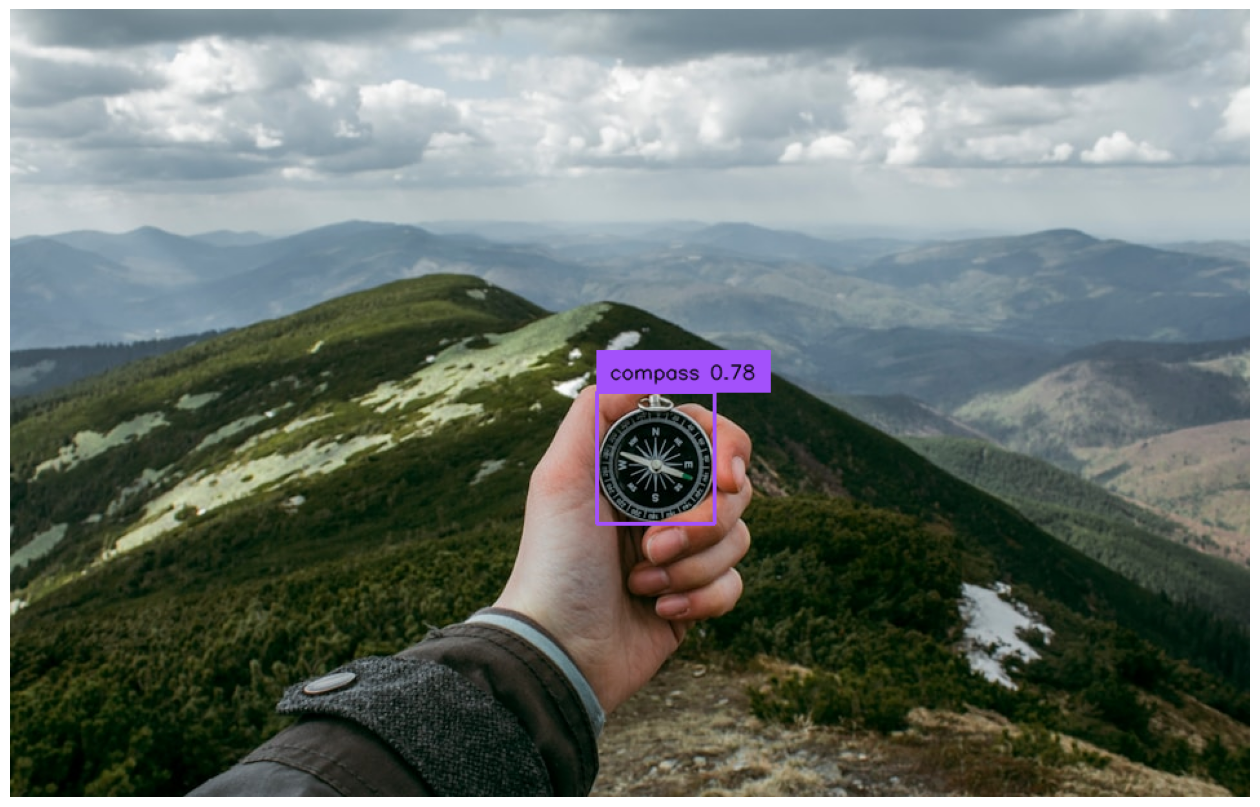

In [9]:
import os
import supervision as sv
from groundingdino.util.inference import load_image, predict, annotate

# # Example: Object detection and annotation for a "compass" image
IMAGE_NAME = "compass.jpg"
IMAGE_PATH = os.path.join(project_dir, "data", IMAGE_NAME)
TEXT_PROMPT = "compass"
BOX_THRESHOLD = 0.70
TEXT_THRESHOLD = 0.25
DEVICE = "cpu"  # Use "cpu" for inference

# Load image
image_source, image = load_image(IMAGE_PATH)
print(image.shape)

# Perform object detection
boxes, logits, phrases = predict(
    model=model,
    image=image,
    caption=TEXT_PROMPT,
    box_threshold=BOX_THRESHOLD,
    text_threshold=TEXT_THRESHOLD,
    device=DEVICE  # Pass "cpu" as the device
)

# Annotate the image
annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)

# Display the annotated image
sv.plot_image(annotated_frame, (16, 16))


Additional examples for "hardware" and other" images can be added similarly...

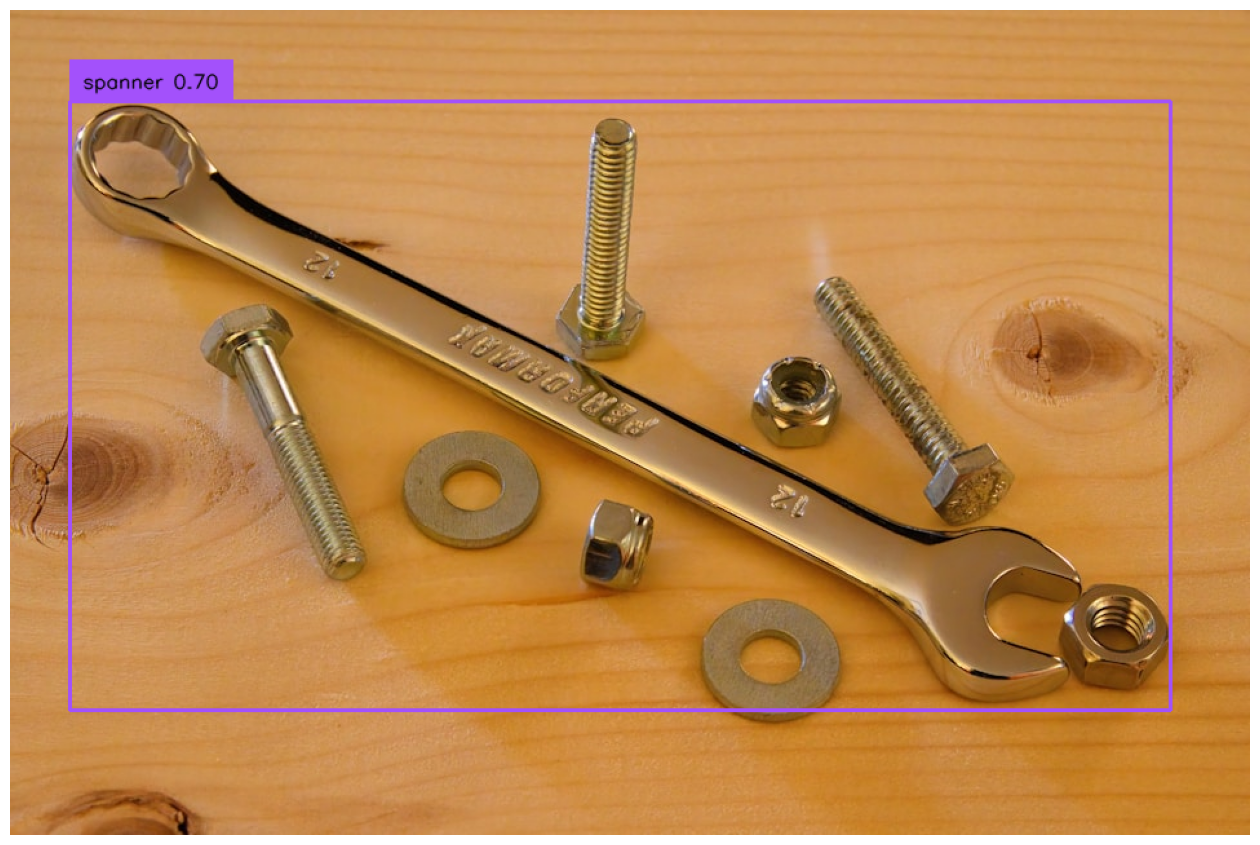

In [10]:
import os
import supervision as sv
from groundingdino.util.inference import load_image, predict, annotate

# Define constants and paths
IMAGE_NAME = "hardware.jpg"
IMAGE_PATH = os.path.join(project_dir, "data", IMAGE_NAME)
TEXT_PROMPT = "spanner"
BOX_THRESHOLD = 0.70
TEXT_THRESHOLD = 0.25
DEVICE = "cpu"  # Specify "cpu" as the device

# Load image
image_source, image = load_image(IMAGE_PATH)

# Perform object detection
boxes, logits, phrases = predict(
    model=model,
    image=image,
    caption=TEXT_PROMPT,
    box_threshold=BOX_THRESHOLD,
    text_threshold=TEXT_THRESHOLD,
    device=DEVICE  # Pass "cpu" as the device
)

# Annotate the image
annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)

# Display the annotated image
sv.plot_image(annotated_frame, (16, 16))

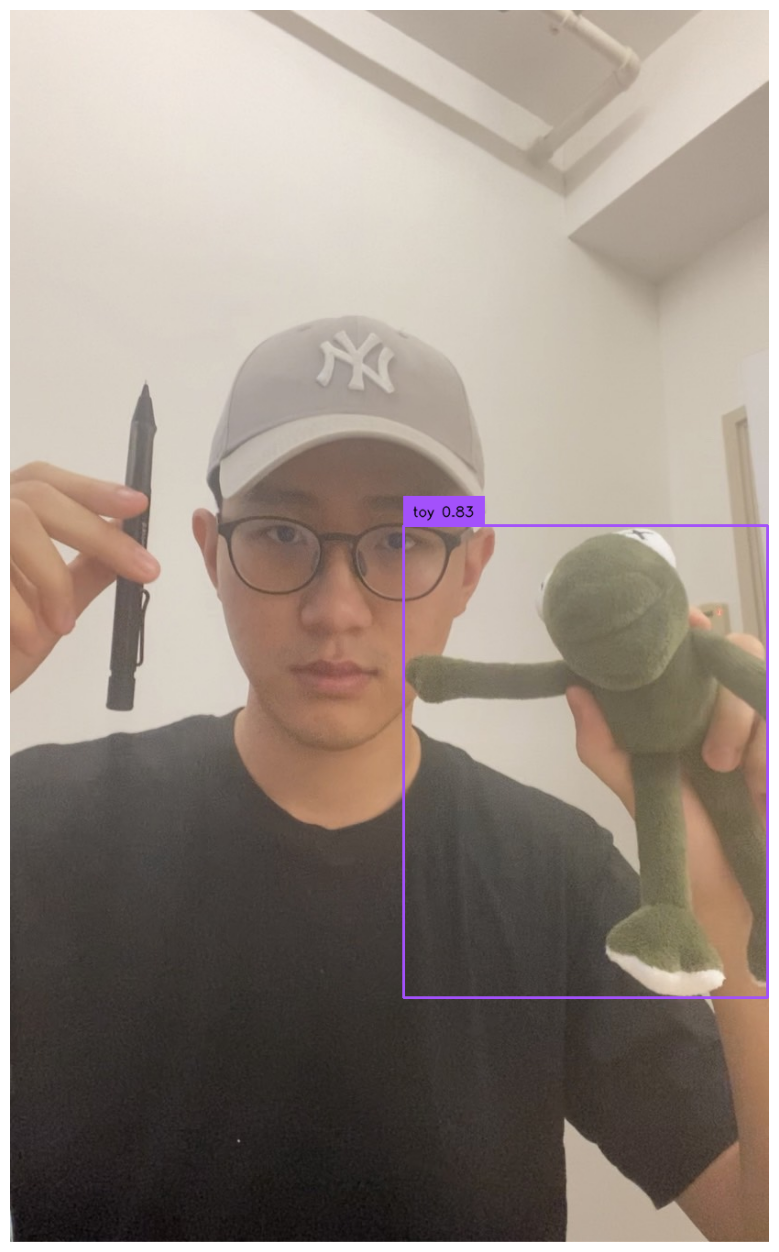

In [11]:
import os
import supervision as sv
from groundingdino.util.inference import load_image, predict, annotate

# Define constants and paths
IMAGE_NAME = "gene.jpg"
IMAGE_PATH = os.path.join(project_dir, "data", IMAGE_NAME)
TEXT_PROMPT = "toy"
BOX_THRESHOLD = 0.70
TEXT_THRESHOLD = 0.25
DEVICE = "cpu"  # Specify "cpu" as the device

# Load image
image_source, image = load_image("/Users/syednafisishrak/Innowing research AI/cv/GroundingDino/data/gene.jpg")

# Perform object detection
boxes, logits, phrases = predict(
    model=model,
    image=image,
    caption=TEXT_PROMPT,
    box_threshold=BOX_THRESHOLD,
    text_threshold=TEXT_THRESHOLD,
    device=DEVICE  # Pass "cpu" as the device
)

# Annotate the image
annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)

# Display the annotated image
sv.plot_image(annotated_frame, (16, 16))

Open Webcam Snap

In [12]:

# The camera is not functioning correctly and 
# is unable to open and capture an image

import os
import cv2
import time
import supervision as sv
from groundingdino.util.inference import load_image, predict, annotate

# Constants and paths
IMAGE_FOLDER = "snap"
TEXT_PROMPT = "face"
BOX_THRESHOLD = 0.50
TEXT_THRESHOLD = 0.25
DEVICE = "cpu"  # Specify "cpu" as the device
SNAP_DURATION = 14  # Total duration to capture frames (in seconds)
SNAP_INTERVAL = 2   # Interval to capture frames (in seconds)
NUM_SNAPS = 5     # Total number of frames to capture

# Change directory to the data directory
os.chdir(project_dir)

# Check if the image folder exists and delete its contents if it does
if os.path.exists(IMAGE_FOLDER):
    for filename in os.listdir(IMAGE_FOLDER):
        file_path = os.path.join(IMAGE_FOLDER, filename)
        try:
            if os.path.isfile(file_path):
                os.unlink(file_path)
        except Exception as e:
            print(e)

# Create folder if it doesn't exist
else:
    os.makedirs(IMAGE_FOLDER)

# Function to capture frames from webcam and save them to the folder
def capture_frames(folder, duration, interval, num_snaps):
    cap = cv2.VideoCapture(0)  # 0 for default webcam
    
    time.sleep(2)  # Delay start by 2 seconds
    
    frame_count = 0
    while frame_count < num_snaps:
        ret, frame = cap.read()
        if not ret:
            break

        cv2.imshow('snap', frame)
        frame_count += 1

        # Save frame every interval seconds
        image_name = f"snap_{frame_count}.jpg"
        cv2.imwrite(os.path.join(folder, image_name), frame)

        time.sleep(interval)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

# Function to annotate images in the folder
def annotate_images(folder):
    annotated_images = []
    for filename in os.listdir(folder):
        if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
            image_path = os.path.join(folder, filename)
            image_source, image = load_image(image_path)

            # Perform object detection
            boxes, logits, phrases = predict(
                model=model,
                image=image,
                caption=TEXT_PROMPT,
                box_threshold=BOX_THRESHOLD,
                text_threshold=TEXT_THRESHOLD,
                device=DEVICE
            )

            # Annotate the image
            annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)
            annotated_images.append((image_path, annotated_frame))

    return annotated_images

# Capture frames from webcam and save them
capture_frames(IMAGE_FOLDER, SNAP_DURATION, SNAP_INTERVAL, NUM_SNAPS)

# Annotate images in the folder and replace them
annotated_images = annotate_images(IMAGE_FOLDER)
for image_path, annotated_frame in annotated_images:
    cv2.imwrite(image_path, annotated_frame)

# # Display annotated images (optional)
# for image_path, annotated_frame in annotated_images:
#     sv.plot_image(annotated_frame, (16, 16), f"Annotated Image: {image_path}")


2024-03-11 02:29:22.695 Python[25845:309640] WARNING: AVCaptureDeviceTypeExternal is deprecated for Continuity Cameras. Please use AVCaptureDeviceTypeContinuityCamera and add NSCameraUseContinuityCameraDeviceType to your Info.plist.
2024-03-11 02:29:28.234 Python[25845:309640] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.
